In [0]:
!nvidia-smi


In [0]:
from keras.layers import *
from keras.models import *
from keras.optimizers import SGD
import warnings
warnings.filterwarnings('ignore')


def conv_block(X, kernel_nb, with_short_cut=False):
    x = Conv2D(kernel_nb, (3, 3), padding='same', strides=(1, 1))(X)
    x = BatchNormalization(axis=-1)(x)
    x = Activation('relu')(x)
    x = Conv2D(kernel_nb, (3, 3), padding='same', strides=(1, 1))(x)
    x = BatchNormalization(axis=-1)(x)
    if with_short_cut:
        shortcut = Conv2D(kernel_nb, (3, 3), padding='same', strides=(1, 1))(X)
        shortcut = BatchNormalization(axis=-1)(shortcut)
        x = add([x, shortcut])
    else:
        x = add([x, X])
    x = Activation('relu')(x)
    return x


input = Input(shape=(28, 28, 3))
# layer1
l11 = conv_block(input, 128, with_short_cut=True)
l12 = conv_block(l11, 128)
pool1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(l12)

# layer2
l21 = conv_block(pool1, 256, with_short_cut=True)
l22 = conv_block(l21, 256)
pool2 = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(l22)

# layer3
l31 = conv_block(l22, 512, with_short_cut=True)
l32 = conv_block(l31, 512)
avePool = AveragePooling2D(pool_size=(2, 2), strides=(2, 2))(l32)

flatten = Flatten()(avePool)
dense = Dense(32)(flatten)
batchnormalization = BatchNormalization(axis=1)(dense)
act = Activation('relu')(batchnormalization)
output = Dense(7, activation='softmax')(act)
ResModel = Model(input, output)

sgd = SGD(learning_rate=0.05, decay=0.9, momentum=0.9, nesterov=True)
ResModel.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
ResModel.summary()


import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
df = pd.read_csv('hmnist_28_28_RGB.csv')
train, test = train_test_split(df, test_size=0.1)
train_x = train.drop('label', axis=1).values.reshape([-1, 28, 28, 3])
train_y = to_categorical(train['label'].values)
test_x = test.drop('label', axis=1).values.reshape([-1, 28, 28, 3])
test_y = to_categorical(test['label'].values)

ResModel.fit(train_x, train_y, epochs=40, validation_split=0.2, batch_size=100, verbose=1)

In [0]:
from keras.layers import *
from keras.models import *
from keras.optimizers import SGD
import warnings
warnings.filterwarnings('ignore')
from keras.applications.inception_v3 import InceptionV3

input_shape = (28, 28, 3)
base_model = InceptionV3(include_top=False, weights='Imagenet', input_shape=input_shape)
input_tensor = Input(shape=input_shape)
bn = BatchNormalization(axis=-1)(input)
x = base_model(bn)
x = Conv2d(32, (1, 1), padding='same', activation='sigmoid')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='sigmoid')(x)
x = Dropout(0.5)(x)
output = Dense(7, activation='softmax')(x)
model = Model(input_tensor, output)

for l in model.layers:
  l.trainable = False
sgd = SGD(learning_rate=0.05, decay=0.9, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()


import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
df = pd.read_csv('hmnist_28_28_RGB.csv')
train, test = train_test_split(df, test_size=0.1)
train_x = train.drop('label', axis=1).values.reshape([-1, 28, 28, 3])
train_y = to_categorical(train['label'].values)
test_x = test.drop('label', axis=1).values.reshape([-1, 28, 28, 3])
test_y = to_categorical(test['label'].values)

ResModel.fit(train_x, train_y, epochs=20, validation_split=0.2, batch_size=100, verbose=1)

In [0]:
from keras.layers import *
from keras.models import *
# from keras.optimizers import SGD
import warnings
warnings.filterwarnings('ignore')
from keras.applications.inception_v3 import InceptionV3

input_shape = (128, 128, 3)
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=input_shape)
input_tensor = Input(shape=input_shape)
bn = BatchNormalization(axis=-1)(input_tensor)
x = base_model(bn)
x = Conv2D(32, (1, 1), padding='same', activation='sigmoid')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='sigmoid')(x)
x = Dropout(0.5)(x)
output = Dense(7, activation='softmax')(x)
model = Model(input_tensor, output)

for l in model.layers:
  l.trainable = False
model.layers[-1].trainable = True
model.layers[-2].trainable = True
model.layers[-3].trainable = True
model.layers[-4].trainable = True
model.layers[-5].trainable = True
model.layers[-6].trainable = True

# sgd = SGD(learning_rate=0.05, decay=0.9, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB
None
['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']
['histo' 'consensus' 'confocal' 'follow_up']


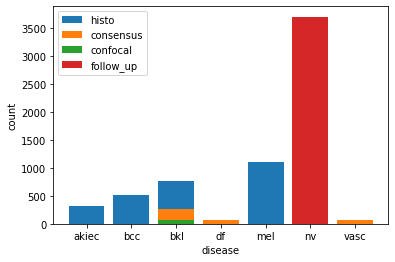

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
meta = pd.read_csv('HAM10000_metadata.csv')
print(meta.info())
print(meta['dx'].unique())
print(meta['dx_type'].unique())
histo = meta[meta['dx_type'] == 'histo']
cons = meta[meta['dx_type'] == 'consensus']
conf = meta[meta['dx_type'] == 'confocal']
fol = meta[meta['dx_type'] == 'follow_up']
c1 = histo['dx'].value_counts().sort_index()
c2 = cons['dx'].value_counts().sort_index()
c3 = conf['dx'].value_counts().sort_index()
c4 = fol['dx'].value_counts().sort_index()
plt.bar(c1.index, c1.values.reshape(-1), label='histo')
plt.bar(c2.index, c2.values.reshape(-1), label='consensus')
plt.bar(c3.index, c3.values.reshape(-1), label='confocal')
plt.bar(c4.index, c4.values.reshape(-1), label='follow_up')
plt.legend()
plt.xlabel('disease')
plt.ylabel('count')
plt.show()


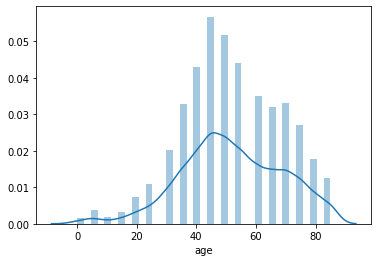

In [5]:
ages = meta['age']
sns.distplot(ages)
plt.show()

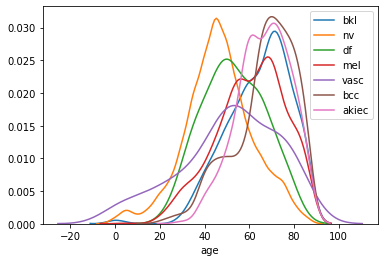

In [9]:
dx = ['bkl','nv','df','mel','vasc','bcc','akiec']
for d in dx:
  subset = meta[meta['dx'] == d]
  age = subset['age']
  sns.distplot(age, hist=False, label=d)
plt.show()

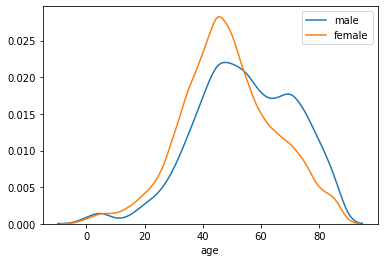

In [12]:
# male
meta_m = meta[meta['sex'] == 'male']
age_m = meta_m['age']
sns.distplot(age_m, hist=False, label='male')
# famale
meta_fm = meta[meta['sex'] == 'female']
age_fm = meta_fm['age']
sns.distplot(age_fm, hist=False, label='female')
plt.show()

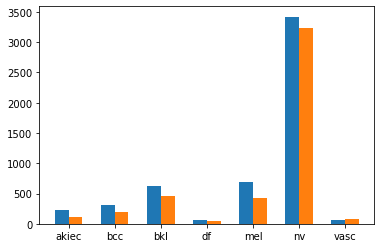

In [23]:
m = meta_m['dx'].value_counts().sort_index()
fm = meta_fm['dx'].value_counts().sort_index()
tick = m.index 
import numpy as np
x = np.arange(len(m))
bar_width = 0.3
plt.bar(x, m.values,bar_width, label='male')
plt.bar(x+bar_width, fm.values, bar_width, label='female')
plt.xticks(x+bar_width/2, tick)
plt.show()

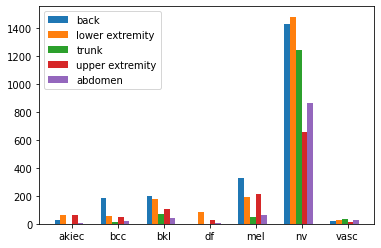

In [40]:
loc = meta['localization']
loc = loc.value_counts().head(5)
tick = sorted(meta['dx'].unique())
x = np.arange(start = 0, stop=28, step=4)
delta_x = 0
for l in loc.index:
  subset = meta[meta['localization'] == l]
  y = []
  for t in tick:
    y.append(len(subset[subset['dx'] == t]))
  plt.bar(x + delta_x, y, 0.5, label=l)
  delta_x = delta_x + 0.5

plt.xticks(x+1.25, tick)
plt.legend()
plt.show()